In [1]:
try:
    from ultralytics import YOLO
except:
    !pip install -q ultralytics
    from ultralytics import YOLO

import torch
import yaml
import os
import shutil

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Device: {device}')
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    !nvidia-smi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 48.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Device: cuda
NVIDIA A100-SXM4-40GB
Sat Jan  4 05:14:20 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|

In [2]:
HOME = os.getcwd()
print(HOME)
project_basepath = f'{HOME}/drive/MyDrive/PROJECT KD'
dataset_basepath = os.path.join(project_basepath, 'datasets')


/content


# Create Dataset

In [ ]:
# # dataset source
# !git clone https://github.com/vinchole/zzzccc.git


Cloning into 'zzzccc'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 66 (delta 1), reused 0 (delta 0), pack-reused 49 (from 1)
Receiving objects: 100% (66/66), 226.91 MiB | 24.19 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [ ]:
# try:
#     import patoolib
# except:
#     !pip install -q patool
#     import patoolib

# zip_file = f"{HOME}/zzzccc/dataset for papar/dataset1.zip"
# output_folder = f"{HOME}/fire-smoke/"
# try:
#     patoolib.extract_archive(zip_file, outdir=output_folder)
#     print("Extraction successful!")
# except Exception as e:
#     print("Error during extraction:", e)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 2.4 MB/s eta 0:00:00


INFO patool: Extracting /content/zzzccc/dataset for papar/dataset1.zip ...
INFO:patool:Extracting /content/zzzccc/dataset for papar/dataset1.zip ...
INFO patool: ... creating output directory `/content/fire-smoke/'.
INFO:patool:... creating output directory `/content/fire-smoke/'.
INFO patool: running /usr/bin/7z x -aou -o/content/fire-smoke/ -- "/content/zzzccc/dataset for papar/dataset1.zip"
INFO:patool:running /usr/bin/7z x -aou -o/content/fire-smoke/ -- "/content/zzzccc/dataset for papar/dataset1.zip"
INFO patool: ... /content/zzzccc/dataset for papar/dataset1.zip extracted to `/content/fire-smoke/'.
INFO:patool:... /content/zzzccc/dataset for papar/dataset1.zip extracted to `/content/fire-smoke/'.


Extraction successful!


In [ ]:
# # zip the dataset to gdrive
# shutil.make_archive(os.path.join(dataset_basepath, 'fire-smoke'), 'zip', output_folder)


'/content/drive/MyDrive/PROJECT KD/datasets/fire-smoke.zip'

### CLAHE CS

In [ ]:
# !unzip -o "{os.path.join(dataset_basepath, 'fire-smoke.zip')}" -d "{HOME}/fire-smoke"

Streaming output truncated to the last 5000 lines.
  inflating: /content/fire-smoke/valid/labels/WEBSmoke3359_jpg.rf.5a9cb12cdd87dfd79719d754d721df7e.txt  
  inflating: /content/fire-smoke/valid/labels/MirrorWEBFire278_jpg.rf.a82f1acac10e4a2c474e03cb5b1aea49.txt  
  inflating: /content/fire-smoke/valid/labels/WEBSmoke3220_jpg.rf.f04a4bfb85efca082be6091d37c07978.txt  
  inflating: /content/fire-smoke/valid/labels/WEBFire142_jpg.rf.cceea8ef42942fcaa1fad56f0e75f5ac.txt  
  inflating: /content/fire-smoke/valid/labels/MirrorWEBFire1590_jpg.rf.cb51b1ba579b403d2b1543c61debacb0.txt  
  inflating: /content/fire-smoke/valid/labels/WEBSmoke1702_jpg.rf.e7359f70fa1cdae63dc344cae6dd182c.txt  
  inflating: /content/fire-smoke/valid/labels/NoiseWEBFire1708_jpg.rf.0ad08788e19211cfe0b7d91352feda58.txt  
  inflating: /content/fire-smoke/valid/labels/NoiseWEBFire1001_jpg.rf.3da1ab0d16e7ed6f08c27ad4f65ae880.txt  
  inflating: /content/fire-smoke/valid/labels/MirrorWEBSmoke2808_jpg.rf.26c01e7813277b297f8dab

In [ ]:
# import numpy as np
# import cv2
# from google.colab.patches import cv2_imshow

# # images paths of original dataset
# images_paths = {
#     'train': os.path.join(HOME, 'fire-smoke/train/images'),
#     'valid': os.path.join(HOME, 'fire-smoke/valid/images'),
#     'test': os.path.join(HOME, 'fire-smoke/test/images'),
# }

# def set_clahe(img):
#     ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
#     channels = cv2.split(ycrcb)

#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     clahe.apply(channels[0], channels[0])

#     cv2.merge(channels, ycrcb)
#     result = cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR)
#     return result

# def set_cs(img):
#     xp = [0, 64, 128, 192, 255]
#     fp = [0, 16, 128, 240, 255]
#     x = np.arange(256)
#     table = np.interp(x, xp, fp).astype('uint8')

#     result = cv2.LUT(img, table)
#     return result



Set: train -- /content/fire-smoke/train/images

Original Image: /content/fire-smoke/train/images/MirrorWEBFire001_jpg.rf.4b3b1d19e9361499087e40494bf31512.jpg


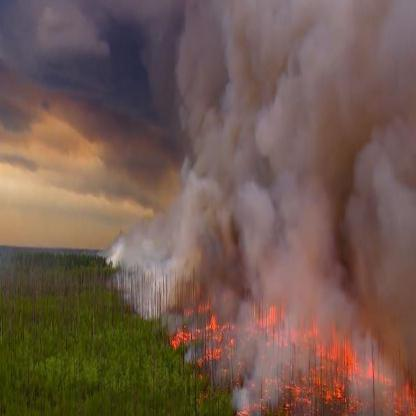

CLAHE Image: /content/fire-smoke/train/images/MirrorWEBFire001_jpg.rf.4b3b1d19e9361499087e40494bf31512.jpg


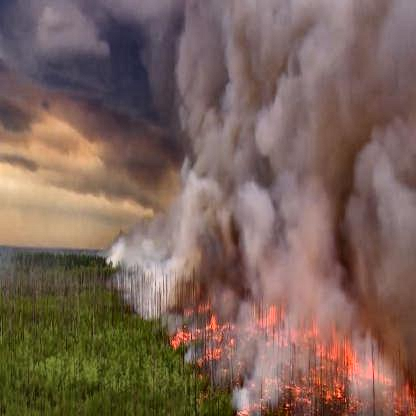

CS Image: /content/fire-smoke/train/images/MirrorWEBFire001_jpg.rf.4b3b1d19e9361499087e40494bf31512.jpg


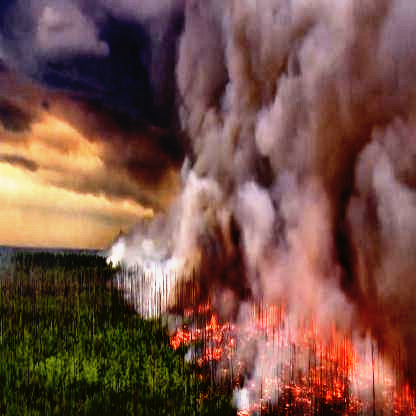

Streaming output truncated to the last 5000 lines.
/content/fire-smoke_clahe_autoclip/train/images/WEBSmoke285_jpg.rf.0319a858a04bc15d9aa08bd0ff49a88c.jpg Success!
/content/fire-smoke_clahe_autoclip/train/images/WEBSmoke2862_jpg.rf.84b1a27d39c79200d130cd39b1e54de1.jpg Success!
/content/fire-smoke_clahe_autoclip/train/images/WEBSmoke2863_jpg.rf.49232c528c3c7c481c9f12871b591dc4.jpg Success!
/content/fire-smoke_clahe_autoclip/train/images/WEBSmoke2864_jpg.rf.254ffa7309571cc19725be860ad5440f.jpg Success!
/content/fire-smoke_clahe_autoclip/train/images/WEBSmoke2866_jpg.rf.e8f0bd6173289235c8204f32d7e5438c.jpg Success!
/content/fire-smoke_clahe_autoclip/train/images/WEBSmoke2869_jpg.rf.b82ed6a844ce4b25a543d53d042b955d.jpg Success!
/content/fire-smoke_clahe_autoclip/train/images/WEBSmoke2870_jpg.rf.0fd146668a1b262952377ad5cbc3a82b.jpg Success!
/content/fire-smoke_clahe_autoclip/train/images/WEBSmoke2871_jpg.rf.f91a9dde8c6705f03abdacd1db25bbea.jpg Success!
/content/fire-smoke_clahe_autoclip/tra

'/content/drive/MyDrive/PROJECT KD/datasets/fire-smoke_clahe_autoclip.zip'

In [ ]:
# first_demo = True
# autoclip = True
# dataset_name = 'fire-smoke_clahe'

# for keytype, path in images_paths.items():

#     print(f'\nSet: {keytype} -- {path}')
#     os.makedirs(os.path.join(HOME, dataset_name, keytype, 'images'), exist_ok=True)
#     os.makedirs(os.path.join(HOME, dataset_name, keytype, 'labels'), exist_ok=True)

#     # copy original labels folder to new folder
#     shutil.copytree(os.path.join(HOME, 'fire-smoke', keytype, 'labels'), os.path.join(HOME, dataset_name, keytype, 'labels'), dirs_exist_ok=True)

#     for img_name in sorted(os.listdir(path)):

#         img_path = os.path.join(path, img_name)
#         if os.path.isfile(img_path) and img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
#             img = cv2.imread(img_path)
#             ori = img.copy()
#             res_clahe = set_clahe(img, autoclip)
#             res_cs = set_cs(res_clahe)

#             if first_demo:
#                 print(f'\nOriginal Image: {img_path}')
#                 cv2_imshow(ori)
#                 print(f'CLAHE Image: {img_path}')
#                 cv2_imshow(res_clahe)
#                 print(f'CS Image: {img_path}')
#                 cv2_imshow(res_cs)
#                 first_demo = False

#             new_path = os.path.join(HOME, dataset_name, f'{keytype}/images/{img_name}')
#             try:
#                 cv2.imwrite(new_path, res_cs)
#                 print(f'{new_path} Success!')
#             except Exception as e:
#                 print(f'Error: {e}, at {new_path}')


# # zip the dataset to gdrive
# shutil.make_archive(os.path.join(dataset_basepath, dataset_name), 'zip', os.path.join(HOME, dataset_name))


# Load Dataset and Create data.yaml

In [3]:
dataset_name = 'fire-smoke_clahe' # 'fire-smoke', 'fire-smoke_clahe'

# unzip the dataset
zip_file = os.path.join(dataset_basepath, f'{dataset_name}.zip')
!unzip -o "{zip_file}" -d "{HOME}/{dataset_name}"

# create data.yaml
data = {
    "train": os.path.join(HOME, f'{dataset_name}/train/images'),
    "val": os.path.join(HOME, f'{dataset_name}/valid/images'),
    "test": os.path.join(HOME, f'{dataset_name}/test/images'),
    "nc": 2,
    "names": ["Smoke", "Fire"]
}

path = os.path.join(HOME, dataset_name)
file_name = "data.yaml"
with open(os.path.join(path, file_name), "w") as file:
    yaml.dump(data, file, default_flow_style=False)

print(f"File YAML created successfully: {os.path.join(path, file_name)}")


Streaming output truncated to the last 5000 lines.
  inflating: /content/fire-smoke_clahe/valid/labels/WEBFire142_jpg.rf.cceea8ef42942fcaa1fad56f0e75f5ac.txt  
  inflating: /content/fire-smoke_clahe/valid/labels/MirrorWEBFire1590_jpg.rf.cb51b1ba579b403d2b1543c61debacb0.txt  
  inflating: /content/fire-smoke_clahe/valid/labels/WEBSmoke1702_jpg.rf.e7359f70fa1cdae63dc344cae6dd182c.txt  
  inflating: /content/fire-smoke_clahe/valid/labels/NoiseWEBFire1708_jpg.rf.0ad08788e19211cfe0b7d91352feda58.txt  
  inflating: /content/fire-smoke_clahe/valid/labels/NoiseWEBFire1001_jpg.rf.3da1ab0d16e7ed6f08c27ad4f65ae880.txt  
  inflating: /content/fire-smoke_clahe/valid/labels/MirrorWEBSmoke2808_jpg.rf.26c01e7813277b297f8dab0cba59efd5.txt  
  inflating: /content/fire-smoke_clahe/valid/labels/NoiseWEBFire285_jpg.rf.51a41425bbbc39472a79d66f5e98c704.txt  
  inflating: /content/fire-smoke_clahe/valid/labels/WEBSmoke813_jpg.rf.5f2c514a2a1d0fd80f585d1ced73e5d0.txt  
  inflating: /content/fire-smoke_clahe/val

# Setup YOLO Model

In [4]:
# Parameters
pretrained_weight = 'yolo11s.pt'
# teacher_weight = 'yolo11s.pt'
epochs = 300
batch_size = 128
imgsz = 640
optimz = 'SGD'
warmup_epochs = 3.0
in_lr_rate = 1e-2
wDecay = 5e-4
augment = False
momentum = 0.937
iou = 0.5

data_path = f'{HOME}/{dataset_name}/data.yaml'
project_name = os.path.join(project_basepath, 'runs/yolo11_clahe_runs')
device_type = 0 if torch.cuda.is_available() else 'cpu'

# Model
model = YOLO(pretrained_weight)

100%|██████████| 18.4M/18.4M [00:00<00:00, 68.7MB/s]


## Training

In [ ]:
results_train = model.train(
    data=data_path,
    epochs=epochs,
    batch=batch_size,
    imgsz=imgsz,
    optimizer=optimz,
    warmup_epochs=warmup_epochs,
    momentum=momentum,
    lr0=in_lr_rate,
    weight_decay=wDecay,
    augment=augment,
    project=project_name,
    name=pretrained_weight.replace('.pt', '') + '_train',
    device=device_type,
)

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/fire-smoke_clahe/data.yaml, epochs=300, time=None, patience=100, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/PROJECT KD/runs/yolo11_runs, name=yolo11s_train2, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.9MB/s]


AMP: checks passed ✅


train: Scanning /content/fire-smoke_clahe/train/labels... 8494 images, 3 backgrounds, 0 corrupt: 100%|██████████| 8494/8494 [00:07<00:00, 1197.27it/s]


train: New cache created: /content/fire-smoke_clahe/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/fire-smoke_clahe/valid/labels... 2114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2114/2114 [00:02<00:00, 937.42it/s]


val: New cache created: /content/fire-smoke_clahe/valid/labels.cache
Plotting labels to /content/drive/MyDrive/PROJECT KD/runs/yolo11_runs/yolo11s_train2/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/PROJECT KD/runs/yolo11_runs/yolo11s_train2
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      32.4G       1.69      2.682      1.743        216        640: 100%|██████████| 67/67 [00:35<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.14s/it]


                   all       2114       6319      0.527      0.475      0.461      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      32.2G      1.504      1.609      1.526        271        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


                   all       2114       6319      0.534      0.515      0.503      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      32.2G      1.542      1.574      1.567        216        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


                   all       2114       6319      0.322      0.349      0.214     0.0717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      32.2G      1.591      1.632       1.62        247        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.21s/it]


                   all       2114       6319      0.197      0.227      0.103     0.0343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      32.2G      1.556      1.569      1.596        253        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


                   all       2114       6319      0.398      0.372      0.303      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      32.2G      1.538      1.534      1.586        238        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


                   all       2114       6319      0.513      0.482      0.454      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      32.3G      1.509      1.486      1.558        237        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


                   all       2114       6319       0.55      0.487      0.483      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      32.1G      1.489      1.444      1.542        241        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


                   all       2114       6319      0.558      0.534      0.528      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      32.2G      1.479      1.423      1.536        264        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.541      0.481      0.481      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      32.1G      1.457      1.388      1.517        255        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.582      0.552      0.563      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      32.2G      1.442      1.362      1.506        274        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


                   all       2114       6319      0.494       0.46      0.426      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      32.2G      1.436       1.34      1.498        214        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


                   all       2114       6319       0.61       0.56      0.586      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      31.9G      1.413      1.306      1.487        261        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.639      0.569      0.593        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      32.2G      1.405      1.278      1.475        248        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


                   all       2114       6319      0.634      0.568      0.594      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      32.3G      1.397      1.278      1.483        241        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]

                   all       2114       6319       0.61      0.528      0.553      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      31.9G      1.388      1.263      1.467        191        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.646      0.578      0.619      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      32.2G      1.376      1.229       1.45        224        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]

                   all       2114       6319      0.627      0.564      0.591      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      32.2G      1.373      1.222       1.45        240        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.664      0.614      0.648      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      32.1G      1.362      1.218      1.446        230        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


                   all       2114       6319      0.628      0.599      0.618      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      31.9G      1.351      1.182      1.432        265        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]

                   all       2114       6319      0.669      0.586      0.638      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      32.2G      1.344      1.185      1.431        293        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.673      0.606      0.652       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      32.2G      1.332      1.153      1.414        236        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.656      0.593      0.643      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300        32G      1.325      1.143       1.41        205        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.687      0.638      0.681      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      32.1G      1.318       1.13      1.404        225        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.692      0.625      0.684      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      32.3G      1.315      1.114        1.4        242        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]

                   all       2114       6319      0.707      0.623      0.682      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      32.1G      1.301      1.103      1.393        281        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.686      0.612      0.664      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      32.3G      1.291      1.077      1.384        246        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.708      0.659      0.713      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      32.1G      1.286      1.084      1.376        187        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.703      0.644      0.694      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      32.2G      1.277      1.061      1.376        206        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.708      0.656      0.707      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      32.1G      1.271      1.052      1.368        225        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.734      0.656       0.72      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      32.2G      1.262      1.032      1.362        213        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319       0.73      0.657       0.72        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      32.2G      1.258      1.025      1.361        228        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.725      0.673      0.732      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300        32G      1.253      1.013      1.355        229        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.713       0.64      0.698      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      31.9G      1.242     0.9968      1.342        189        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]

                   all       2114       6319       0.72      0.655      0.712      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      32.1G       1.24     0.9923      1.342        292        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.748      0.691      0.748      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      32.1G      1.233     0.9804      1.333        253        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.732      0.666      0.728       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      32.1G      1.222     0.9695      1.331        221        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.745      0.686      0.748      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      32.3G      1.221     0.9625      1.325        191        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.751      0.684       0.75      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300        32G      1.214     0.9542      1.323        210        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.757      0.693      0.756      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      32.2G      1.209     0.9469      1.316        238        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.748      0.691      0.752      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      32.2G        1.2     0.9262      1.305        240        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319       0.76      0.691      0.756      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      32.2G      1.188     0.9314      1.306        266        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.744      0.709      0.757      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      32.1G      1.187     0.9171      1.297        238        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.771      0.704      0.761      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      31.9G      1.184       0.91      1.298        247        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.757      0.699      0.768      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300        32G       1.17     0.9032      1.289        243        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.742      0.709      0.755      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      32.1G      1.172     0.8924      1.292        210        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.772      0.706      0.769      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      32.2G      1.162     0.8809      1.278        218        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.768      0.715      0.771      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      32.3G      1.163     0.8762      1.277        282        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.787      0.699      0.778      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      32.1G       1.15     0.8788      1.275        277        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]

                   all       2114       6319      0.787      0.715      0.782      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      32.1G      1.145     0.8576      1.265        271        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.779      0.713      0.782      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      32.1G      1.143     0.8554      1.268        236        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.793      0.726      0.789      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      32.2G      1.139     0.8514      1.267        270        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319       0.77      0.708      0.777      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      32.2G      1.134     0.8446      1.261        230        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319       0.79      0.714      0.782      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      32.1G      1.135     0.8441      1.262        199        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319       0.78      0.723      0.784       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      31.9G      1.121     0.8239      1.251        257        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319        0.8       0.73      0.798      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      32.2G      1.113     0.8248      1.249        213        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.788      0.725       0.79      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      32.1G      1.117     0.8195      1.248        250        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.783      0.728      0.794      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      32.3G      1.106     0.8124      1.236        248        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.806       0.72        0.8      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      32.2G      1.109      0.807      1.239        242        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.781      0.736      0.793      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      32.1G      1.095     0.7963      1.235        219        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.814      0.737      0.809      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      32.2G        1.1     0.7993      1.235        231        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.801      0.736      0.799      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      32.1G      1.088     0.7903      1.227        283        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.802      0.749      0.812      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      32.2G       1.09      0.793      1.224        197        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.808      0.732      0.802      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      32.2G      1.082     0.7848      1.222        297        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.821      0.746      0.811      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      32.2G      1.079     0.7734      1.222        233        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.805      0.748      0.808      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      32.1G      1.077       0.77      1.221        233        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.816       0.75       0.81      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      32.2G      1.073     0.7655      1.221        220        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.808      0.756      0.818      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      32.2G      1.064     0.7554      1.209        240        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.815      0.752      0.818      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      32.2G      1.066     0.7592       1.21        259        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.815      0.745      0.814      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      32.3G      1.051     0.7515      1.208        203        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319       0.82      0.756       0.82      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300        32G      1.062     0.7565      1.207        230        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319       0.82      0.755      0.826      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      32.1G      1.044     0.7434      1.199        194        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.817      0.757      0.821       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      32.2G      1.044     0.7383      1.194        241        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.814      0.765      0.822      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      32.2G      1.042     0.7343       1.19        238        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319       0.81      0.753      0.818      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      32.1G      1.048      0.739      1.195        222        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.822      0.769      0.829      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      32.3G      1.038     0.7285      1.192        241        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.812      0.761      0.825      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      32.2G      1.029     0.7261      1.187        241        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.825      0.758      0.828      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      31.9G      1.025     0.7199      1.184        217        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.818      0.759      0.822      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      31.9G      1.024     0.7139      1.181        235        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.837      0.773      0.835      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      32.2G       1.02     0.7111      1.178        229        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.831      0.766       0.83      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      32.1G      1.012     0.7018      1.175        267        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.833      0.785      0.838       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      32.3G      1.016     0.7086      1.176        236        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.843      0.774       0.84      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300        32G      1.018     0.7076      1.177        232        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.837      0.777      0.843      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      32.1G      1.015     0.6985      1.171        289        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.825       0.78      0.838      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      32.1G     0.9993     0.6926      1.168        218        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.846      0.771      0.839      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      32.3G      1.004      0.695      1.167        234        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.834      0.757      0.827      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300        32G     0.9936     0.6863      1.164        223        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.845      0.775      0.843       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300        32G     0.9909     0.6794      1.162        252        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.845      0.777      0.844      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      32.3G     0.9898     0.6796      1.155        268        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.846      0.774       0.84       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      32.2G      0.991     0.6743      1.157        284        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.838      0.778      0.842      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300        32G     0.9878      0.684       1.16        235        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.838      0.778      0.842      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      32.1G     0.9886     0.6766      1.158        247        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.844      0.785      0.847       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      32.3G     0.9765     0.6722      1.154        225        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.838      0.792      0.848      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      32.1G     0.9783     0.6656      1.153        228        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.863      0.771      0.847      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      32.1G     0.9748     0.6653      1.149        285        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.864      0.783      0.855      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300        32G     0.9661     0.6547      1.144        198        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.844      0.787      0.848      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      32.2G     0.9679     0.6654      1.148        229        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.856      0.781      0.855      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      32.3G     0.9588      0.651      1.142        231        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.845      0.786       0.85       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      32.2G     0.9582     0.6502      1.141        227        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.853      0.785      0.852      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      32.1G     0.9629     0.6495      1.141        300        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319       0.85      0.796      0.852      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      32.3G     0.9513     0.6445      1.137        232        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319       0.85      0.798      0.855      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      31.9G     0.9495     0.6448      1.135        231        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.861      0.789      0.855      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      32.1G     0.9476     0.6403      1.134        249        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.854      0.795      0.856      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      32.3G     0.9472     0.6392      1.131        245        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.864      0.792      0.858       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300        32G     0.9408     0.6351      1.129        251        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.863      0.795      0.862      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      32.3G     0.9452     0.6342       1.13        251        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.861        0.8      0.861      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      32.2G     0.9354     0.6357       1.13        244        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.854      0.804      0.861      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      31.9G     0.9298     0.6244      1.124        254        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.847      0.806      0.861      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      32.1G     0.9363     0.6251      1.125        264        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.853        0.8      0.861      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      32.3G     0.9245     0.6219       1.12        252        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.858      0.801      0.862      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      32.2G     0.9269     0.6203      1.121        296        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.863      0.799      0.861      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      31.9G      0.924     0.6194       1.12        225        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.859      0.805      0.862      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      31.9G     0.9231     0.6242       1.12        248        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.868        0.8      0.864      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      32.1G     0.9156     0.6147      1.115        218        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.862      0.804      0.863      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      32.2G     0.9139     0.6093      1.116        222        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.865      0.808      0.869      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      32.2G     0.9127     0.6131      1.113        243        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.864      0.806      0.865      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      32.2G     0.9121     0.6047       1.11        223        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.869      0.807      0.868      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      32.1G     0.9092     0.6047      1.111        242        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.871      0.796      0.865       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300        32G     0.9024     0.6024      1.109        187        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.868      0.802      0.864      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      32.1G        0.9     0.6005      1.103        268        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.875      0.798      0.866      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      32.1G     0.9009      0.604       1.11        199        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319       0.87      0.803      0.868       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      32.3G      0.893     0.5942      1.105        238        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.871      0.805       0.87       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      32.3G     0.8929     0.5962      1.103        254        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.874      0.806      0.871      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      32.1G     0.8897     0.5901      1.102        194        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.868      0.811      0.873      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      32.2G     0.8898      0.588        1.1        289        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.871      0.806      0.872      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      32.1G     0.8872     0.5902      1.101        190        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]

                   all       2114       6319      0.875       0.81      0.873        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      32.3G     0.8852     0.5845      1.096        243        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319       0.88      0.803      0.871      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      32.1G     0.8833     0.5835      1.094        303        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.878      0.803       0.87      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      32.3G     0.8772     0.5804      1.093        216        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.869      0.807      0.871      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300        32G     0.8751     0.5803      1.097        221        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319       0.87      0.819      0.873        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      32.3G     0.8749     0.5768      1.093        305        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.875      0.811      0.874        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      32.1G     0.8673     0.5742      1.085        228        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.872      0.812      0.873      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      31.9G     0.8729     0.5739      1.086        218        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.883      0.812      0.877      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      32.1G     0.8654     0.5717      1.087        258        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319       0.87      0.819      0.875      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      32.1G     0.8636     0.5666      1.083        220        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.874      0.818      0.876      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      32.1G     0.8613     0.5664      1.083        228        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.873      0.817      0.875      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      32.2G     0.8619      0.568      1.082        242        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.874      0.815      0.876      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      32.1G     0.8514     0.5595      1.081        242        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.881      0.813      0.875      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      32.3G     0.8616     0.5626      1.082        246        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.878      0.813      0.872      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300        32G     0.8547     0.5547      1.079        288        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.877      0.814      0.873      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      32.1G     0.8465     0.5571      1.077        227        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319       0.88      0.816      0.873       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      32.1G     0.8537     0.5622       1.08        298        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.882      0.812      0.874      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      32.2G      0.845     0.5537      1.078        204        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.887      0.809      0.874      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      32.3G     0.8407      0.548       1.07        236        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.889      0.812      0.875      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      32.1G     0.8487     0.5607      1.077        240        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.894      0.809      0.878      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      32.2G     0.8452     0.5507      1.074        257        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.889      0.818      0.879      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300        32G     0.8378     0.5452      1.073        279        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.891       0.81      0.879      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      32.1G     0.8363     0.5477       1.07        260        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.886      0.813      0.879      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      32.1G     0.8388     0.5455      1.073        251        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319       0.89      0.814      0.879      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      32.3G     0.8277     0.5424      1.069        238        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.892      0.817      0.881      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      32.1G      0.827     0.5393      1.067        229        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.894      0.819      0.883      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      32.3G      0.821     0.5392      1.063        185        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.889      0.822      0.882      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      32.3G     0.8247     0.5354      1.064        260        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.885      0.821       0.88      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      31.9G     0.8293      0.537      1.067        260        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.874      0.829      0.881      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      32.1G     0.8253     0.5369      1.063        263        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.882      0.823       0.88       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      32.1G     0.8128     0.5337      1.062        234        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.887       0.82       0.88       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      32.2G     0.8173     0.5302      1.062        233        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.886      0.822      0.882      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      32.1G     0.8149     0.5282      1.059        250        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.883      0.825      0.881      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300        32G     0.8125     0.5241      1.057        245        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.882      0.827      0.882      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      32.1G     0.8119     0.5257      1.056        238        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.883      0.826      0.881      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      32.3G     0.8129     0.5253      1.057        288        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.883      0.826      0.882      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300        32G     0.8076     0.5237      1.054        264        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.883      0.824      0.882      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      32.3G     0.8023     0.5243      1.053        231        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.885      0.823      0.882      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      32.2G     0.8072     0.5289      1.054        253        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.889      0.824      0.885      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      32.2G     0.7985     0.5218      1.054        274        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.894      0.821      0.886      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      32.2G     0.8001     0.5177      1.051        247        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.897      0.818      0.884      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      32.1G     0.7929     0.5099      1.048        214        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319       0.89      0.826      0.884      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      32.2G     0.7986     0.5163      1.048        203        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.892      0.825      0.884      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      32.2G     0.7957     0.5131      1.049        219        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.894      0.827      0.885      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      31.9G     0.7956     0.5152       1.05        303        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.896      0.825      0.886       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      32.1G     0.7869     0.5122      1.045        221        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.896      0.823      0.885      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      32.1G     0.7842      0.505      1.043        238        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.892      0.826      0.885      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      32.3G      0.789     0.5119      1.045        221        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.888      0.829      0.885      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      31.9G      0.785     0.5068      1.043        254        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.893      0.829      0.886      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      32.2G      0.782      0.501       1.04        240        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.16it/s]

                   all       2114       6319      0.893      0.827      0.885      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      32.3G     0.7766     0.4992       1.04        209        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.892      0.827      0.886      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      32.2G     0.7727     0.5021      1.038        263        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.897      0.825      0.885      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      32.1G     0.7748     0.5015      1.036        250        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.894      0.826      0.885      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      32.3G     0.7726     0.4974      1.034        227        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.895      0.828      0.886      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      31.9G     0.7663     0.4919      1.037        222        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.894      0.828      0.885      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      32.1G      0.768     0.4931      1.035        214        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.897      0.826      0.885      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      31.9G     0.7676     0.4954      1.034        271        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.896      0.827      0.885      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      32.2G     0.7691      0.493      1.036        213        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.895      0.831      0.885      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      32.2G     0.7593     0.4868       1.03        274        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.895      0.833      0.886      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      32.1G     0.7569     0.4889      1.028        226        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.896      0.832      0.887      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      32.2G     0.7566     0.4855      1.032        245        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.894      0.834      0.887      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      32.2G     0.7551     0.4837       1.03        240        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.894      0.835      0.887      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      32.3G     0.7512     0.4798      1.027        239        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.896      0.832      0.888      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      31.9G     0.7505       0.48      1.025        241        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.895      0.834      0.888       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      31.9G     0.7481     0.4816      1.024        264        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319       0.89       0.84      0.888       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      32.2G     0.7485     0.4792      1.026        229        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.895      0.833      0.888      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      32.2G     0.7499     0.4797      1.025        233        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.889      0.839      0.889      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      32.3G      0.739     0.4758      1.017        257        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.893      0.835      0.889      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      32.2G     0.7412      0.475      1.023        247        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319       0.89      0.837      0.888      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      32.3G     0.7425     0.4742      1.024        279        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.893      0.834      0.889      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      32.2G     0.7375     0.4738      1.018        245        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.886      0.842      0.889      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      32.3G     0.7341     0.4704      1.016        221        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.885      0.844      0.889      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      31.9G     0.7323     0.4661      1.017        228        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.886      0.841      0.889      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      31.9G      0.734     0.4655      1.018        269        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.886       0.84      0.888      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      32.3G     0.7308     0.4701      1.014        248        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.888      0.841      0.889      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      32.1G     0.7308     0.4722      1.019        285        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.892      0.838      0.889      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      32.2G     0.7278     0.4619      1.014        231        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.893      0.837      0.889      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300        32G      0.719      0.459      1.014        204        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319       0.89       0.84      0.889      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      32.2G     0.7212     0.4585      1.012        202        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319       0.89       0.84       0.89      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      31.9G     0.7135     0.4569      1.011        234        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.889      0.841      0.889      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      32.1G     0.7168     0.4553       1.01        231        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.889       0.84      0.888      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      32.2G     0.7138     0.4588       1.01        217        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.891      0.839      0.889      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      32.2G     0.7171     0.4606      1.013        220        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.892      0.838      0.889      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      32.1G      0.712     0.4524       1.01        233        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.899      0.832      0.889      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      32.2G     0.7088     0.4522      1.007        222        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.901      0.833       0.89      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      32.1G     0.7046     0.4502      1.005        224        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319        0.9      0.832       0.89      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      32.2G     0.7057      0.448      1.006        253        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.897      0.834       0.89      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300        32G     0.7023     0.4478      1.002        248        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.898      0.833       0.89      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      32.3G     0.6959     0.4409      1.003        212        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.896      0.837       0.89       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      32.2G     0.6995     0.4464      1.003        235        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.896      0.839      0.891       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      31.9G      0.696     0.4429      1.002        193        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.893      0.839       0.89       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      31.9G     0.6997     0.4446     0.9996        264        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.894      0.838       0.89       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      31.9G     0.6904     0.4378     0.9992        213        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319        0.9      0.835       0.89       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      32.2G     0.6943      0.437     0.9987        200        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.899      0.837       0.89       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      32.2G     0.6846     0.4358     0.9957        269        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.16it/s]

                   all       2114       6319      0.894      0.839      0.891      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      31.9G     0.6861     0.4372     0.9984        265        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.894       0.84      0.891      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      32.1G     0.6833     0.4344     0.9941        248        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.893      0.841      0.891      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      32.3G     0.6825     0.4337     0.9931        236        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.894       0.84      0.891      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      32.1G     0.6905     0.4363     0.9975        213        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.895      0.839      0.891      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300        32G     0.6721     0.4304     0.9937        201        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.895       0.84       0.89      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      31.9G     0.6784     0.4306     0.9927        265        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.895      0.839       0.89      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      32.3G     0.6742     0.4264     0.9867        261        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.897      0.837      0.891      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      32.2G     0.6717     0.4233     0.9907        225        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.898      0.836      0.891      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      32.1G     0.6725     0.4251     0.9887        213        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.897      0.837      0.891      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      32.1G     0.6663     0.4198     0.9871        261        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.898      0.837      0.891      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      32.2G     0.6711      0.424     0.9913        285        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319        0.9      0.836      0.891      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      32.3G     0.6653      0.423     0.9881        238        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.902      0.833       0.89      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      32.2G      0.661     0.4209      0.985        246        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899      0.836      0.891      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      32.3G       0.66     0.4169      0.983        264        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.898      0.835      0.891      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      32.2G       0.66     0.4192     0.9841        228        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.898      0.836      0.891      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      32.2G     0.6531     0.4095     0.9827        248        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319        0.9      0.836      0.891      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      32.3G     0.6541     0.4155     0.9795        291        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.897      0.838      0.892      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      32.2G     0.6588     0.4171     0.9828        264        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.898      0.838      0.891      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      32.3G     0.6536      0.415     0.9797        241        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.899      0.838      0.891      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      32.3G     0.6463     0.4118     0.9794        248        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899      0.837      0.891      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      32.1G     0.6449     0.4075      0.978        257        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319        0.9      0.838      0.892      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300        32G     0.6413     0.4065     0.9771        255        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899      0.838      0.892      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      31.9G     0.6364     0.4021      0.974        225        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.898      0.838      0.892      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      31.9G     0.6393     0.4032      0.978        257        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899      0.837      0.892      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      32.2G     0.6389     0.4022     0.9767        195        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899      0.835      0.892      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300        32G     0.6358     0.4006     0.9737        252        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899      0.836      0.892      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      32.1G     0.6332     0.4001     0.9725        237        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.899      0.836      0.892      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      32.2G     0.6384     0.3995     0.9747        247        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.898      0.835      0.892      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      32.2G     0.6313      0.396     0.9717        225        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.898      0.836      0.892      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      32.1G     0.6264     0.3951     0.9691        230        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899      0.836      0.893      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      32.3G     0.6278     0.3925     0.9694        260        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899      0.837      0.893      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      31.9G      0.629     0.3981     0.9711        254        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319        0.9      0.836      0.892      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      32.2G     0.6205     0.3913     0.9676        227        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.899      0.837      0.892      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      32.1G     0.6253     0.3965     0.9709        240        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319        0.9      0.837      0.892      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      32.1G     0.6188     0.3902     0.9659        265        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319        0.9      0.837      0.892       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      32.1G     0.6113     0.3852     0.9635        217        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319        0.9      0.837      0.893       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      31.9G     0.6124     0.3865     0.9634        238        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899      0.838      0.893       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      32.2G     0.6137     0.3854      0.963        265        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.898      0.839      0.893       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      32.1G     0.6084     0.3837     0.9643        227        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.897      0.841      0.893       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      32.1G       0.61     0.3822      0.962        197        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.896      0.841      0.893      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      32.2G     0.6037     0.3817     0.9606        219        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.896      0.841      0.893      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      32.1G     0.5998     0.3797     0.9594        247        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.896      0.842      0.893      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      32.3G     0.6013     0.3796     0.9601        262        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all       2114       6319      0.898       0.84      0.893      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      32.3G     0.6001     0.3795      0.961        295        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.898       0.84      0.893      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      32.3G     0.5953     0.3757     0.9594        208        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.898      0.839      0.893      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      31.9G     0.5966     0.3764     0.9588        229        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.898       0.84      0.894      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      32.1G     0.5949     0.3736     0.9578        247        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.898       0.84      0.894      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      31.9G     0.5841      0.367     0.9542        211        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899      0.839      0.894      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      32.2G     0.5918      0.372     0.9561        250        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.899       0.84      0.894      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      32.2G      0.587     0.3692     0.9561        259        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.898      0.841      0.894      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      32.1G     0.5814     0.3679     0.9513        253        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.899      0.841      0.894      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      31.9G      0.582     0.3685     0.9532        237        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.899       0.84      0.894      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      31.9G     0.5816     0.3649     0.9534        254        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.899       0.84      0.894      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      32.2G     0.5776     0.3643     0.9508        247        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.899       0.84      0.894      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      32.1G     0.5784     0.3668     0.9526        221        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319        0.9       0.84      0.895      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300        32G      0.574     0.3627     0.9488        211        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.898      0.841      0.895      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      32.1G      0.574     0.3643     0.9486        228        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319        0.9      0.839      0.895      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      32.1G     0.5743     0.3644       0.95        228        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319        0.9      0.838      0.895      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      31.9G      0.574     0.3606     0.9487        226        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.901      0.838      0.895      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300        32G     0.5653     0.3589     0.9468        249        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.901      0.837      0.895      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      31.9G     0.5693     0.3581     0.9489        213        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.901      0.838      0.895      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      32.1G     0.5596     0.3525     0.9431        247        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.902      0.838      0.895      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      31.9G      0.559      0.355     0.9453        203        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.902      0.838      0.896      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300        32G     0.5602     0.3514      0.941        218        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.902      0.839      0.896      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      32.2G     0.5571     0.3509     0.9424        226        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.902      0.839      0.896      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      32.3G     0.5594     0.3521     0.9449        268        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.902      0.838      0.896      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      32.1G     0.5551     0.3524     0.9431        275        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

                   all       2114       6319      0.902      0.838      0.896      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      32.3G     0.5491     0.3473     0.9403        258        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.902      0.839      0.896      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      32.3G     0.5535     0.3483     0.9419        227        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.902      0.839      0.896      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      32.1G     0.5513     0.3469     0.9405        249        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.902      0.839      0.896      0.666


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300        32G     0.5475     0.2973     0.9137        158        640: 100%|██████████| 67/67 [00:36<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.903      0.839      0.896      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300        32G     0.5169     0.2785      0.901        108        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.903      0.839      0.896      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      32.1G     0.5033     0.2727     0.8937        133        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.903      0.839      0.896      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300        32G     0.5004     0.2704     0.8941        114        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.902       0.84      0.896      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      32.2G     0.4923     0.2672       0.89        131        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]

                   all       2114       6319      0.903      0.839      0.896      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300        32G     0.4908     0.2663     0.8902        123        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.903      0.838      0.896      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      32.2G     0.4849     0.2652     0.8871        139        640: 100%|██████████| 67/67 [00:33<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.904      0.838      0.896      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300        32G     0.4816     0.2624     0.8835        177        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.904      0.838      0.896      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      31.9G     0.4736       0.26     0.8828        137        640: 100%|██████████| 67/67 [00:33<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all       2114       6319      0.905      0.837      0.896      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300        32G     0.4745     0.2599     0.8828        115        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all       2114       6319      0.905      0.837      0.896      0.668



300 epochs completed in 3.566 hours.
Optimizer stripped from /content/drive/MyDrive/PROJECT KD/runs/yolo11_runs/yolo11s_train2/weights/last.pt, 19.2MB
Optimizer stripped from /content/drive/MyDrive/PROJECT KD/runs/yolo11_runs/yolo11s_train2/weights/best.pt, 19.2MB

Validating /content/drive/MyDrive/PROJECT KD/runs/yolo11_runs/yolo11s_train2/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]


                   all       2114       6319      0.905      0.838      0.896      0.668
                 Smoke       1902       2250      0.931      0.876      0.926      0.733
                  Fire       1360       4069      0.879      0.799      0.866      0.603
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/drive/MyDrive/PROJECT KD/runs/yolo11_runs/yolo11s_train2


In [ ]:
results_train

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d26487b4eb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Eval

In [5]:
model = YOLO(os.path.join(project_name, 'yolo11s_train/weights/best.pt'))

results_val = model.val(
    data=data_path,
    batch=batch_size,
    imgsz=imgsz,
    iou=iou,
    augment=augment,
    project=project_name,
    name=pretrained_weight.replace('.pt', '') + '_val',
    device=device_type,
)

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 156MB/s]
val: Scanning /content/fire-smoke_clahe/valid/labels... 2114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2114/2114 [00:01<00:00, 1178.52it/s]


val: New cache created: /content/fire-smoke_clahe/valid/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.08it/s]


                   all       2114       6319      0.903      0.842      0.899      0.673
                 Smoke       1902       2250      0.933      0.878      0.928      0.736
                  Fire       1360       4069      0.874      0.806       0.87       0.61
Speed: 0.9ms preprocess, 1.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/drive/MyDrive/PROJECT KD/runs/yolo11_clahe_runs/yolo11s_val2


In [6]:
results_val

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78f5bc1fc730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Testing

In [ ]:
model = YOLO(os.path.join(project_name, 'yolo11s_train/weights/best.pt'))

results_predict = model.predict(
    source=f'{HOME}/{dataset_name}/test/images/',
    imgsz=imgsz,
    iou=iou,
    device=device_type,
)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1059 /content/fire-smoke/test/images/MirrorWEBFire004_jpg.rf.f22cdb22d15cbc7b27b3c3656dbb30cf.jpg: 640x640 1 Smoke, 3 Fires, 10.7ms
image 2/1059 /content/fire-smoke/test/images/MirrorWEBFire012_jpg.rf.c5f033de58daf52390659dbabf0f1cb4.jpg: 640x640 1 Smoke, 1 Fire, 10.9ms
image 3/1059 /content/fire-smoke/test/images/MirrorWEBFire041_jpg.rf.0f5a5688e0bd986267f45341b5c64655.jpg: 640x640 2 Smokes, 1 Fire, 10.7ms
image 4/1059 /content/fire-smoke/test

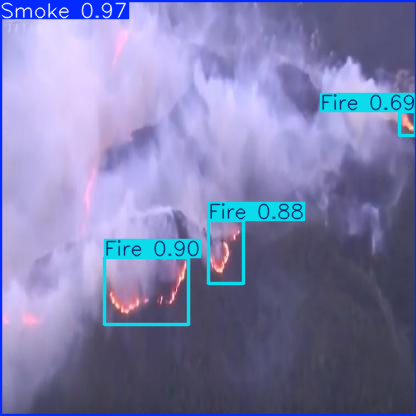

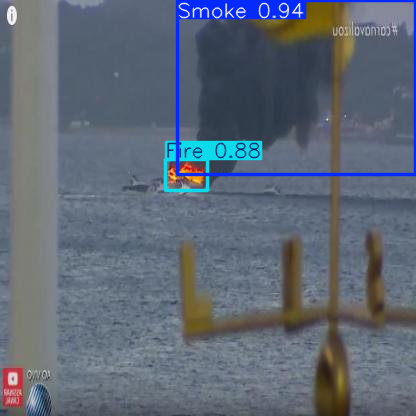

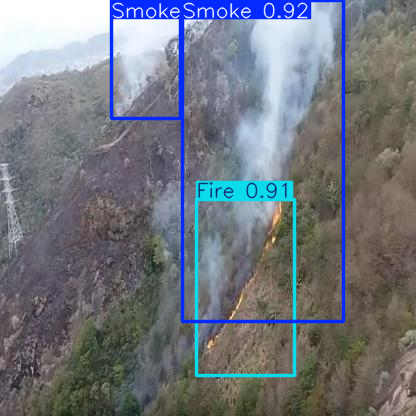

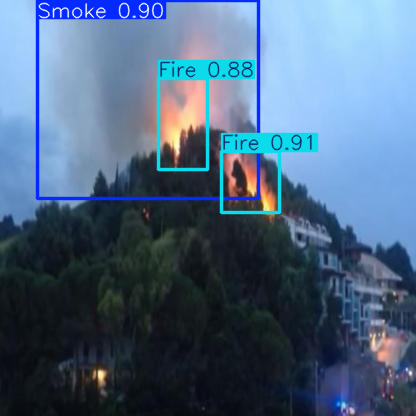

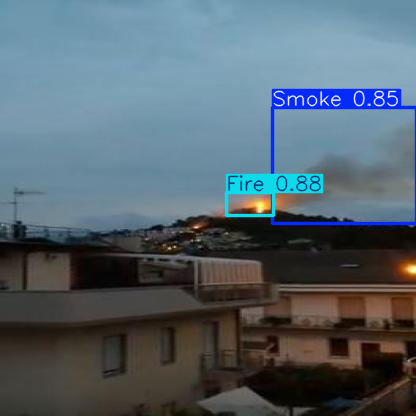

In [ ]:
from PIL import Image
import cv2

for img in results_predict[:5]:
    image = img.plot()
    image = Image.fromarray(image[..., ::-1])
    display(image)
    # break

# Knowledge Distillation

In [ ]:
import os

if not os.path.exists('/content/weights'):
    !wget -P /content/weights https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt
    !wget -P /content/weights https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11s.pt

    print(f'list of weight:')
    %ls /content/weights

In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/PROJECT KD/')

from yolo11-KD import YOLO_KD

# Model
model_kd = YOLO_KD(pretrained_weight)

In [ ]:
results_train = model.train(
    teacher_weight=teacher_weight,
    data=data_path,
    epochs=epochs,
    batch=batch_size,
    imgsz=imgsz,
    optimizer=optimz,
    warmup_epochs=warmup_epochs,
    momentum=momentum,
    lr0=in_lr_rate,
    weight_decay=wDecay,
    augment=augment,
    project=project_name,
    name=f'{teacher_weight.replace(".pt", "")}-{pretrained_weight.replace(".pt", "")}_train',
    device=device_type,
)